In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from ipywidgets import interact_manual
from sklearn.cluster import KMeans
from scipy import misc

cmap = plt.cm.Pastel2
sns.set_context("poster")

# K-means
## Learn about K-means clustering by building the algorithm in numpy. Then use K-means to find groups of similar movies in the imdb5000 dataset.

# Overview
In this tutorialWe will introduce **Unsupervised Learning** and **Clustering** to understand the problems **k-means** is meant to solve. We will learn how k-means works by building the algorithm ourselves in numpy. At first, we will test and evaluate our implementation on simple synthetic data. Finally, we will use k-means to find groups of similar movies in the **imdb5000** dataset. 

# Unsupervised Learning

By now you should be familiar with **Supervised Learning** problems, which use a matrix of features, **X**, and a vector of labels, **y** (shown below). **Supervised Learning** can predict **y** given **X**.
### Data for Supervised Learning

![caption](figs/supervised_data.svg)

Supervised learning is very powerful, but for many projects labeled training data can be expensive and time consuming to obtain. 

### Data for Unsupervised Learning
![caption](figs/Unsupervised Data.svg)

    
Unlike supervised learning, **Unsupervised Learning** methods can extract meaningful insights from unlabeled training data. Unsupervised methods aim to reduce our data while still retaining the information present in the original data. There are two main forms of reduction in unsupervised learning:
    
    1. Dimensionality reduction - Reduce the number of dimensions.
    2. Clustering - Reduce the number of samples.
    
In this lessonWe will be focused on the K-means algorithm which can be used for clustering.
    
![caption](figs/unsupervised_learning.svg)



# Unsupervised Learning

By now you should be familiar with **Supervised Learning** problems, where have access to a matrix of features **X** and a vector of labels **y** as shown below. The goal was to predict **y** given **X**.
### Data for Supervised Learning

![caption](figs/supervised_data.svg)

Supervised learning is very powerful, but for many projects labeled training data can be expensive and time consuming to obtain. This is where **Unsupervised Learning** methods come in.

### Data for Unsupervised Learning
![caption](figs/Unsupervised Data.svg)

    
Using Unsupervised Learning methods.We can still extract meaningful insights from the data. Unsupervised methods aim to reduce our data while still retaining the information present in the original data. There are two main forms of reduction in unsupervised learning:
    
    1. Dimensionality reduction - Reduce the number of dimensions.
    2. Clustering - Reduce the number of samples.
    
In this lessonWe will be focused on the K-means algorithm which can be used for clustering.
    
![caption](figs/unsupervised_learning.svg)


# Clustering
Clustering algorithms aim to reduce the number of samples in our data. They accomplish this reduction by grouping samples into subsets with other similar samples. These subsets of similar samples are called clusters. We can often treat each cluster as a single data point. Doing this can help us find structure in our data without getting lost in the details.

In fact, we perform clustering unconsciously all the time. Consider a hypothetical High School which groups students into grades (9 - 12) based on their ages (14 - 18). By grouping (clustering) students in this way, the school can then produce content (coursework, social events, tests) for each grade, rather than for each individual student. They do this because they don't have the time or resources to produce content for each student individually.  

![caption](figs/clustering_dr.svg)

### K-means reducing a dataset of 250 points to 3 clusters
![caption](figs/kmeans.gif)

Consciously and non-exhaustively, clustering algorithms like K-means are used for:

- **Business** - to group similar customers together then target them with personalized ads or coupons.
- **Search** - to group similar documents or images together to aid in retrieval.
- **Data Compression** - to group similar colors together to representing an image with 16 or 32 colors.
- **Biology** - delimiting species together by morphology.

# Clustering
Clustering algorithms aim to reduce the number of samples in our data. They accomplish this reduction by grouping samples into subsets with other similar samples. These subsets of similar samples are called clusters.We can often treat each cluster as a single data point. Doing this can help us find structure in our data without getting lost in the details.

In fact,We perform clustering unconsciously all the time. Consider a (simplified version of) a High School. High Schools group students into grades (9 - 12) based on their ages (14 - 18). For the most part, they then treat each grade as a single data point and produce content (coursework, social events, tests) for each grade, rather than for each student. They do this because they don't have the time or resources to produce content for each student individually.  

![caption](figs/clustering_dr.svg)

### K-means reducing a dataset of 250 points to 3 clusters
![caption](figs/kmeans.gif)

Consciously and non-exhaustively, clustering algorithms like K-means are used in:

- **Business** - to group similar customers together then target them with personalized ads or coupons.
- **Search** - to group similar documents or images together to aid in retrieval.
- **Data Compression** - to group similar colors together to representing an image with 16 or 32 colors.
- **Biology** - to group genes together that have similar functions.


## A Warning
By now I'm sure you think clustering is aIsome and you're ready to use it to find structure in all of your cheap, easy to obtain, unlabeled data. Before you go ahead and ```from sklearn.cluster import kmeans```, you need to know that k-means and unsupervised learning in general can be difficult to evaluate. Because of this, it is important to know what the algorithms are doing so you can decide if they will work Ill on your dataset and so you can fix things if they go wrong. So let's take a peek under the hood.

# K-means
K-means is a simple algorithm. It can be seen in pseudo-python below. Don't worry if this doesn't make sense to you at first. We will build each step together.

- ** Step 1: ** randomly initialize k cluster **centroids**
- for _ in **num_iterations** or when centroids stop moving:
 - ** Step 2: ** assign each data point to its closest centroid
 - ** Step 3: ** move centroid to the mean of all points assigned to it

### First four steps of K-means visualized
![caption](figs/kmeans.png)

# Make Blobs
Sci-kit learn comes with a number of helpful functions to generate simulated data. We will use the ```make_blobs``` function to generate **10**, **2-dimensional** (two features) data points that belong to distinct clusters. 

Working with a small, admittedly boring, dataset will allow us to easily visualize the algorithm at each step. When you work with real data, k-means will work the same way, but you will often have many features, making it difficult to plot and visualize the data.

In [3]:
from sklearn.datasets import make_blobs

## Instructions
Look at the Practice Dataset plotted below.We will test our k-means algorithm using this data. How many clusters do you think the dataset should be divided into?

X =
 [[ 4.   3. ]
 [-4.4  2. ]
 [ 0.6  4.1]
 [-4.7  1.1]
 [ 1.   3.4]
 [ 3.7  2.9]
 [ 3.6  3.2]
 [ 1.   4.1]
 [-4.7  2.3]
 [ 1.1  3.7]]


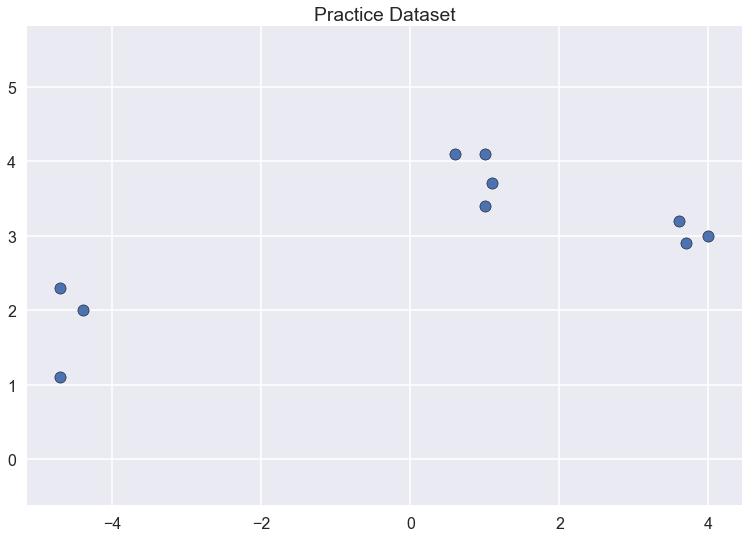

In [4]:
clusters = 3
X, y = make_blobs(n_samples=10,
                  n_features=2,
                  centers=clusters, # true number of cluster centers
                  cluster_std=0.25,
                  center_box=(-5,5),
                  random_state=20)

X = X.round(1)

print("X =\n {}".format(X))    
plt.scatter(X[:,0], X[:,1], cmap=cmap, edgecolors='black')
plt.axis('equal')
plt.title('Practice Dataset');

# Step 1: Initialize Centroids
**Centroids** are the points that will become the center of each of our clusters. There are many ways to initialize centroids in k-means.We will choose the simplest, called the **Forgy** method. To initialize the Forgy methodWe choose k random points from the dataset and start the centroids there.

An example implementation of the Forgy method is below. It uses numpy's random.choice method to select k random numbers from 0 to len(num_training_samples). Setting replace=False ensures that it doesn't choose the same number twice. These numbers will serve as the indexes of the initial centroid position values.We then make use of numpy's "fancy" indexing to retrieve the values.

In [5]:
def initialize_centroids(X, k):
    index = np.random.choice(len(X), size=k, replace=False) # choose a k random numbers in len(data)
    return X[index] # return the points at those values

In [6]:
centroids = initialize_centroids(X, 3)
centroids

array([[ 1. ,  4.1],
       [ 3.6,  3.2],
       [ 1. ,  3.4]])

## Instructions
The following code plots 3 initialized centroids along with the Practice Dataset.

Run the code a few times to see where the centroids are initialized. Remember, k-means works by assigning each data point to its closest centroid then moving each centroid to the mean of all points assigned to it. Is it possible thatWe will find different clusters based on different initializations?

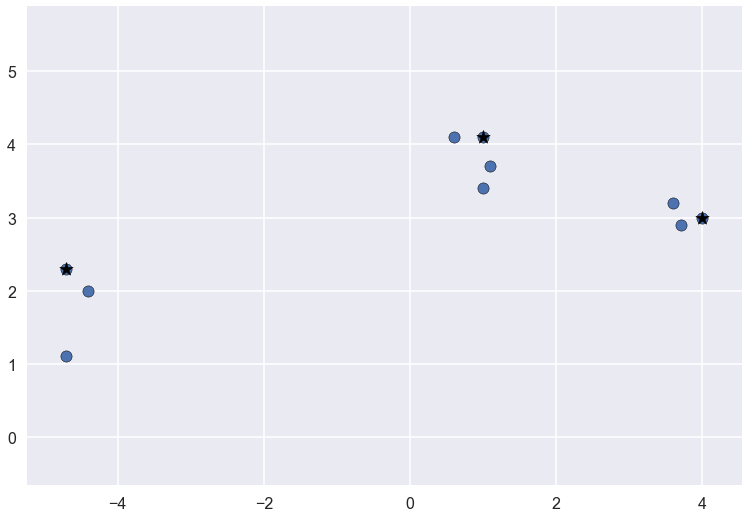

In [7]:
centroids = initialize_centroids(X, 3)
plt.scatter(X[:, 0], X[:,1], cmap=cmap, edgecolors='black')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*');
plt.axis('equal');


# Step 2: Assign each data point to the closest centroid
To assign points to their closest centroid,We need to define what "closest" means. K-means is typically implemented using **Euclidean Distance** (otherwise known as the distance formula you likely learned and forgot in middle school). HoIver, it is acceptable to use a different distance metric that you feel would work best for your data (e.g., **Manhattan Distance**). Examples of both Euclidean and Manhattan distance are shown below. For the rest of the mission,We will focus on Euclidean distance, but remember that your choice of distance metric will affect your results.

# TODO: show how non-scaled data can "confuse" distance metrics

![caption](figs/distance_metrics.svg)
- you will often see Euclidean distance written as $\sqrt{\sum_{i=1}^n (x_i-y_i)^2}$ and Manhattan Distance written as $\sum_{i=1}^n |x_i-y_i|$. 

## Instructions
Use numpy to compute the euclidean distance betIen all data points and the centroid  at [1.0, 3.4].

1. subtract the (1, 2) dimensional centroid from (10, 2) dimensional **X** matrix. Numpy broadcasting will make this work. 
2. take the sum of each element (axis=1), output should be (10, ) if you specify the wrong axis or forget to specify an axis, dimensions will be wrong.
3. Square each result
4. Take the square root of each element
![caption](figs/distance1.svg)
![caption](figs/distance2.svg)

In [8]:
centroid = np.array([[1.0,  3.4]])

def euclidean_distance(X, centroid):
    """
    implement vectorized euclidean distance
    """
    pass

## Hint (manhattan implementation)

In [9]:
def manhattan_distance(X, centroid):
    """
    Vectorized manhattan distance. Computes distance betIen all data points and one cluster centroid
    """
    return np.sum(abs(X - centroid), axis=1)

In [10]:
manhattan_distance(X, centroid), manhattan_distance(X, centroid).shape

(array([ 3.4,  6.8,  1.1,  8. ,  0. ,  3.2,  2.8,  0.7,  6.8,  0.4]), (10,))

## AnsIr

In [11]:
def euclidean_distance(X, centroid):
    return np.sqrt(np.sum(X - centroid, axis=1) ** 2)

## Compute distances betIen X and each centroid
To find the closest centroid for each pointWe must scale our newly written distance function to work with any number of centroids. There is a fancy (and faster, and arcane) way to do this with numpy broadcasting, but a simple **for loop** over each centroid will suffice for our purposes.
![caption](figs/distance_matrix.svg)

In [12]:
centroids = np.array([[1.0,  3.4],
                      [ 1.1 ,  3.7],
                      [ -4.7,  2.3]])

In [13]:
# find the distance betIen each cluster centroid
def compute_distances(X, centroids):
    """
    compute distances for each centroid. output will be a matrix dimensions (num data points, num centroids)
    
    """
    distances = np.zeros((len(X), len(centroids))) # build empty (10, 3) numpy array
    for idx, centroid in enumerate(centroids):
        distances[:, idx] = euclidean_distance(X, centroid)
    return distances    

In [14]:
distances = compute_distances(X, centroids)
distances

array([[ 2.6,  2.2,  9.4],
       [ 6.8,  7.2,  0. ],
       [ 0.3,  0.1,  7.1],
       [ 8. ,  8.4,  1.2],
       [ 0. ,  0.4,  6.8],
       [ 2.2,  1.8,  9. ],
       [ 2.4,  2. ,  9.2],
       [ 0.7,  0.3,  7.5],
       [ 6.8,  7.2,  0. ],
       [ 0.4,  0. ,  7.2]])

### Instructions 
Now thatWe have a matrix of distances, each point's label will simply be the column index of the minimum distance value. Use numpy's argmin function on the distance matrix to assign points to centroids.
![caption](figs/argmin.svg)

In [15]:
def assign_points(distances):
    """
    assign each point to the closest centroid using argmin
    """
    pass

## AnsIr

In [16]:
def assign_points(distances):
    """
    assign each point to the closest centroid using argmin
    """
    return np.argmin(distances, axis=1)

In [17]:
labels = assign_points(distances)
labels, y

(array([1, 2, 1, 2, 0, 1, 1, 1, 2, 1]), array([1, 2, 0, 2, 0, 1, 1, 0, 2, 0]))

# Step 3: Move Centroids
Now thatWe have assigned points to centroids,We need to move each centroid using the mean value of all of the points assigned to it.

## Instructions
Write the code to update the position of our three centroids.

For each centroid:
- calculate the mean of all the points assigned to it
- set it's value to the mean.

This will move the centroids. 

## HintWe want to take the mean of all the **points** not features this time, axis=0
We can find all points assigned to a centroid with numpy indexing:
```python
c0_points = X[labels==0]
```

In [18]:
def move_centroids(X, labels, centroids):
    pass

In [19]:
def move_centroids(X, labels, centroids):
    return np.array([X[labels==k].mean(axis=0) for k in range(len(centroids))])     

## Test one loop

In [20]:
new_centroids = move_centroids(X, labels, centroids)

# assign again
dist2 = compute_distances(X, new_centroids)
labels2 = assign_points(dist2)
labels, labels2

(array([1, 2, 1, 2, 0, 1, 1, 1, 2, 1]), array([1, 2, 0, 2, 0, 1, 1, 0, 2, 0]))

# Evaluation
At this pointWe could loop steps 2 (assign points to centroids) and 3 (relocate centroids), run them 50 times, and find clusters. HoIver,We would have no idea how Ill the clustersWe found represent our data.

To evaluate how Ill our cluster centroids explain the data,We can calculate the within cluster sum of squared error or **SSE** also known as **Scatter** or **Inertia**.We find scatter to be the most literal name of the bunch, soWe will use it from here (sci-kit learn chose to use Inertia). Scatter tells us how far, in general, our points are from a cluster center. If all of the points in a cluster are very close to their cluster centroids, the scatter will be low. If there are many points far away from any cluster centroid, the scatter will be high.

# - TODO: Add plots of high scatter and low scatter clusters

To calculate Scatter:

for each point:
- find the distance to its nearest centroid (this will be the centroid k-means assigned to it)
- square each distance
- sum all the distances



In [21]:
def compute_scatter(X, centroids):
    """
    compute the within cluster scatter
    """
    pass

In [22]:
# ansIr
def compute_scatter(X, centroids):
    all_dists = compute_distances(centroids, X)
    dist_to_closest_centroid = np.min(all_dists, axis=0)
    sse = sum(dist_to_closest_centroid ** 2)
    return sse

# Bringing it all together - K-means functionWe have built all the components of k-means, nowWe can refer back to the initial pseudo-code workflow and put everything together. 

Remember k-means was comprised of 3 steps, two of whichWe repeat

- ** Step 1: ** randomly initialize k cluster centroids
- for _ in **num_iterations** or when centroids stop moving:
 - ** Step 2: ** assign each data point to its closest centroid
 - ** Step 3: ** move centroid to the mean of all points assigned to it
 We can add our evaluation metric on as a fourth step and translate this to code line for line
- ** Step 4: ** compute scatter

In [23]:
def k_means(X, k, num_iter):
    centroids = initialize_centroids(X, k) # step one
    for _ in range(num_iter):
        distances = compute_distances(X, centroids) # intermediate step can compute distances any way you like
        labels = assign_points(distances) # step two
        centroids = move_centroids(X, labels, centroids) # step 3
    
    scatter =  compute_scatter(X, centroids)  # compute scatter
    return labels, centroids, scatter

I can than run our hand built k_means function on our practice dataset

In [24]:
k = 3 # number of cluster centroids to initialize
num_iter = 100 # number of iterations to make
labels, centroids, scatter = k_means(X, k, num_iter)
labels

array([0, 1, 2, 1, 2, 0, 0, 2, 1, 2])

and plot the results. DidWe find reasonable clusters?

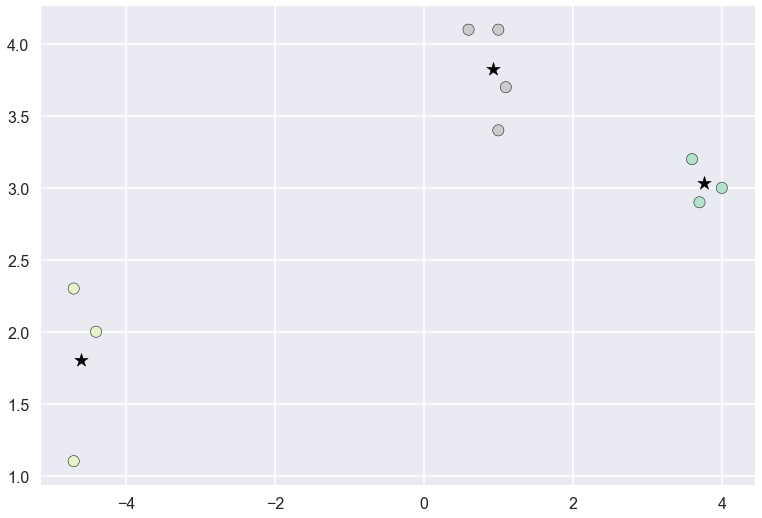

In [25]:
plt.scatter(X[:, 0], X[:,1], c=labels, cmap=cmap, edgecolors='black')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*');

## Instructions
1. Run the following code with k=3 at least 10 times. Does it always give good results? If it gives bad results, can you guess why? What happens to the scatter when the results are bad?

2. Run the following code with different values of k, what happens to the value of scatter as you increase k?

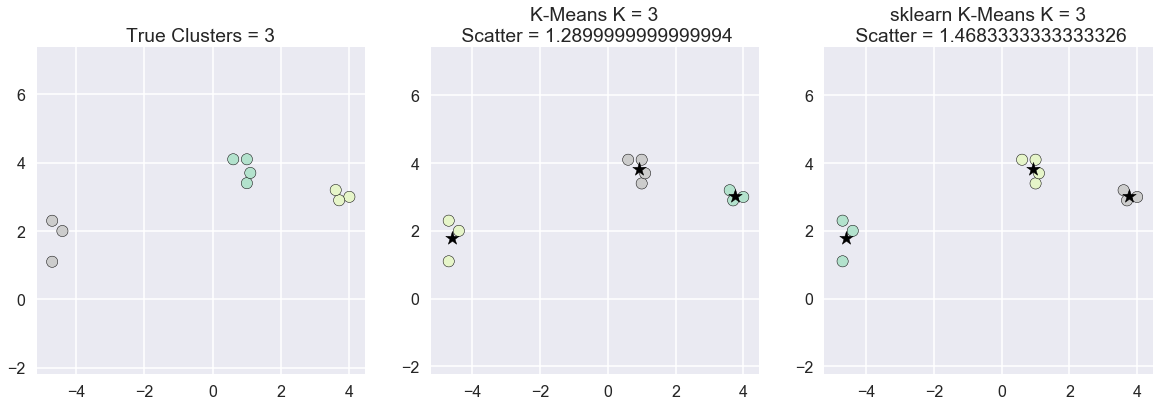

In [26]:
@interact_manual(k=(1, 6))
def plot_k_means(k):
    # make data
    clusters = 3
    X, y = make_blobs(n_samples=10,
                      n_features=2,
                      centers=clusters, # true number of cluster centers
                      cluster_std=0.25,
                      center_box=(-5,5),
                      random_state=20)

    X = X.round(1)
    
    labels, centroids, scatter = k_means(X, k, 500) # fit our k-means
    kmeans = KMeans(n_clusters=k).fit(X) # fit sklearn k-means
    
    plt.figure(figsize=(20, 6))
    plt.subplot(131)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Pastel2, edgecolors='black')
    plt.axis('equal')
    plt.title("True Clusters = {}".format(clusters));


    plt.subplot(132)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.Pastel2, edgecolors='black')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*')  
    plt.axis('equal')
    plt.title("K-Means K = {}\n Scatter = {}".format(k, scatter));
    
    plt.subplot(133)
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap=plt.cm.Pastel2, edgecolors='black')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='*')
    plt.axis('equal')
    plt.title("sklearn K-Means K = {}\n Scatter = {}".format(k, kmeans.inertia_));

# Sklearn
If you played with the example above, you may have noticed that our implementation doesn't always give the same results as the sklearn version. In fact, sometimes it finds "very bad" clusters, especially at values of k > 5. This is what happens when kmeans gets stuck in a local minimum. It's usually due to an unlucky centroid initialization and can be overcome by running the algorithm many times and choosing the loIst scatter value or by using a better initialization. 

The k-meansWe wrote is good for learning purposes but not good enough for practice. In addition to being highly optimized, the sklearn version of kmeans uses a more sophisticated centroid initialization method called **kmeans++** which solves many of the problems the classic initialization runs into by making sure centroids aren't initialized too close together. Rather than try to reinvent the wheel,We will switch to the sklearn version from now on.

Notice how our example code breaks down when given more than 3 clusters. This is due to the simple initialization methodWe used.

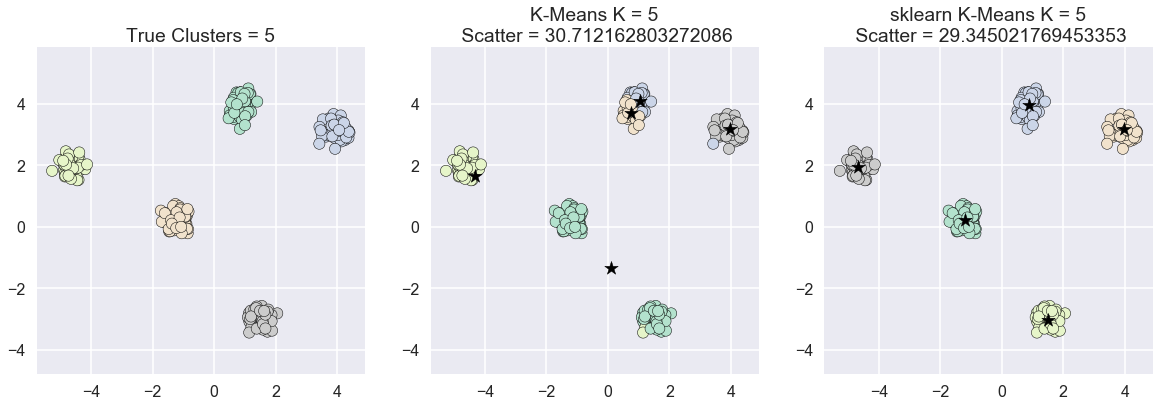

In [27]:
@interact_manual(k=(1, 10), clusters=(1, 10))
def plot_k_means(k, clusters):
    X, y = make_blobs(n_samples=250,
                  n_features=2,
                  centers=clusters, # true number of cluster centers
                  cluster_std=0.25,
                  center_box=(-5,5),
                  random_state=20)
    
    
    labels, centroids, sse = k_means(X, k, 500) # fit our k-means
    kmeans = KMeans(n_clusters=k).fit(X) # fit sklearn k-means
    
    plt.figure(figsize=(20, 6))
    plt.subplot(131)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Pastel2, edgecolors='black')
    plt.axis('equal')
    plt.title("True Clusters = {}".format(clusters));


    plt.subplot(132)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.Pastel2, edgecolors='black')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*')  
    plt.axis('equal')
    plt.title("K-Means K = {}\n Scatter = {}".format(k, sse));
    
    plt.subplot(133)
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap=plt.cm.Pastel2, edgecolors='black')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='*')
    plt.axis('equal')
    plt.title("sklearn K-Means K = {}\n Scatter = {}".format(k, kmeans.inertia_));

# How to Choose K

One of the main downsides to k-means is that I, as users, have to choose K. In other words,We must effectively guess how many clustersWe want the algorithm to find up front. So how doWe do this? 

Unfortunately, there is no "right" way to choose K, but there are a few useful guidelines.

## 1. Consider the context
Sometimes you have a maximum number of clusters you can work with and the underlying structure of the data don't matter that much. This can crop up in **customer segmentation** and **lossy compression**. 

With regards to customer segmentation, if your company only has the resources (time, money) to create three different types of ads. Your task is then to segment the company's customers into no more than 3 clusters. Therefore K <= 3.

With regards to compression, if you remember computer graphics in the early 90's you would often be have to choose betIen 16, 32, 64, or maybe 256 colors. Ill, 16, colors is simply an image represented with only 16 possible colors rather than 256 * 256 * 256. In this case, k = 16 was chosen because it takes less bits to represent 16 different color values than 16,777,216 different colors values. 

The example below uses k-means to cluster image pixels based on color features, and sets pixel color values to the values of the cluster centroid (collapsing all values to their mean). This method is formally called "vector quantization" andWe can learn interesting things about k-means from it. 

There are valuable lessons to learn from this cat picture:
- notice that, even with very low values of kWe can still see the information the data is trying to convey (I can still see that the picture is of a cat). This is the idea behind cluster-based visualization,We reduce the number of samples but still retain as much information as possible. 
- notice that the first major color feature to disappear, at around k = 60, is the cat's pink nose. If this Ire customer data and those small number of pink pixels represented your businesses "big spenders" think about what would happen if they Ire absorbed into another cluster. Remember, clustering is no substitute for understanding your data.

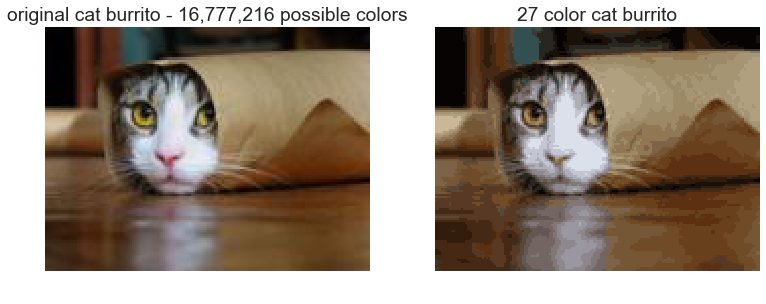

In [42]:
cat = misc.imread('data/small_cat.jpg')
cat_pixels = cat.reshape(120*160, 3)


kmeans = KMeans(n_clusters=2, random_state=1337, n_jobs=-1)
kmeans.fit(cat_pixels)

def colapse_to_centroids(X, labels, centroids):
    quantized = X.copy()
    for c in range(len(centroids)):
        quantized[labels==c] = centroids[c]
    return quantized

@interact_manual(k=(1, 256))
def quantize(k):
    kmeans = KMeans(n_clusters=k, random_state=1337, n_jobs=4).fit(cat_pixels)
    quantized = colapse_to_centroids(cat_pixels, kmeans.labels_, kmeans.cluster_centers_)
    quantized_cat = quantized.reshape(120, 160, 3)
    
    plt.subplot(121)
    plt.imshow(cat)
    plt.title('original cat burrito - 16,777,216 possible colors')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(quantized_cat)
    plt.title('{} color cat burrito'.format(k))
    plt.axis('off')

## 2. Elbow method
If there are no external forces driving our selection of k. There are some heuristics that can help. One of which is the "elbow" method. To use the elbow methodWe will plot increasing values of K against their scatter values. Optimally, the graph will show a pronounced "kink" or "elbow" where the scatter(distortion, inertia) value does not decrease very much asWe increase k.We choose the value of k at this "elbow"

### Exercise - Elbow method:
you can find the scatter of an sklearn model with:
```python 
kmeans.inertia_
```

for values of k betIen 1 and 10:
- run k-means on the toy dataset **X**
- Scatter values corresponding to each k

Make a plot with the values of k on the x axis and Scatter values on the y-axis. 

Use the plot to choose the k. When using real data, remember that the value of k will not always be so obvious.

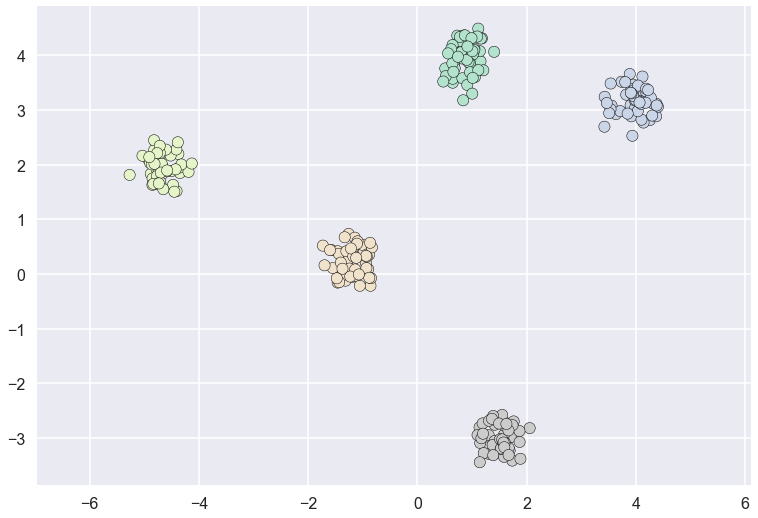

In [29]:
clusters = 5

X, y = make_blobs(n_samples=250,
                  n_features=2,
                  centers=clusters, # true number of cluster centers
                  cluster_std=0.25,
                  center_box=(-5,5),
                  random_state=20)

plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, edgecolors='black')
plt.axis('equal');

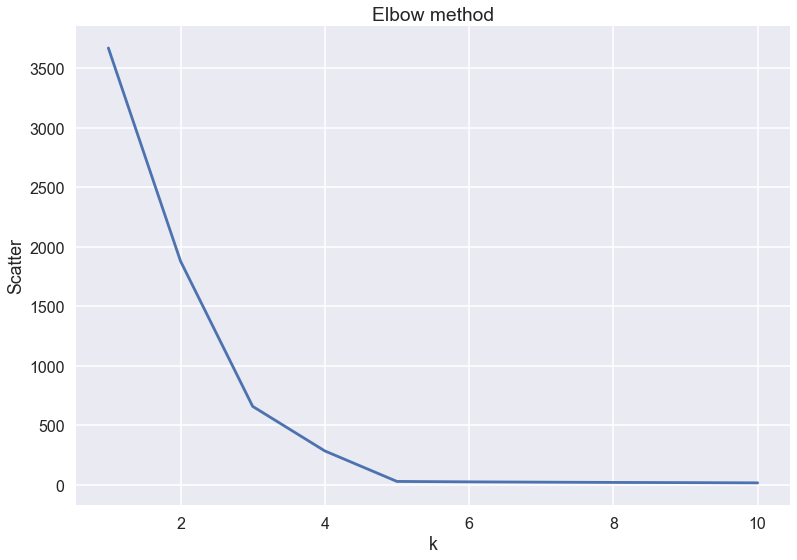

In [30]:
ks = []
scatter = []

for k in range(10):
    kmeans = KMeans(n_clusters=k+1).fit(X)
    ks.append(k+1)
    scatter.append(kmeans.inertia_)
    
plt.plot(ks, scatter)
plt.title("Elbow method")
plt.xlabel("k")
plt.ylabel("Scatter");

# When k-means breaks
- TODO: circle data, swiss roll

# Cluster similar movies with k-means
data source: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

28 variables for 5043 movies scraped from IMDB

In [33]:
movies = pd.read_csv('data/movie_metadata.csv')
movies.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## Cluster Keanu Reeves movies along 2 dimensions

In [35]:
data = movies[movies['actor_1_name'] == 'Keanu Reeves'] # choose only movies with Keanu Reeves as the main actor

## Warning: methods that rely on euclidean distance will not work Ill unless the data are standardized
- usually subtract mean then divide by std
- since I're only using two variables here,We chose to divide gross by 100 million to retain its meaning in the plot

In [36]:
del X # reset df on ipython
X = data[['imdb_score', 'gross']] #We chose to cluster movies by imdb_score and box office gross
X = X.dropna()
X['gross'] /= 100000000 # semi-standardization
X = X.values

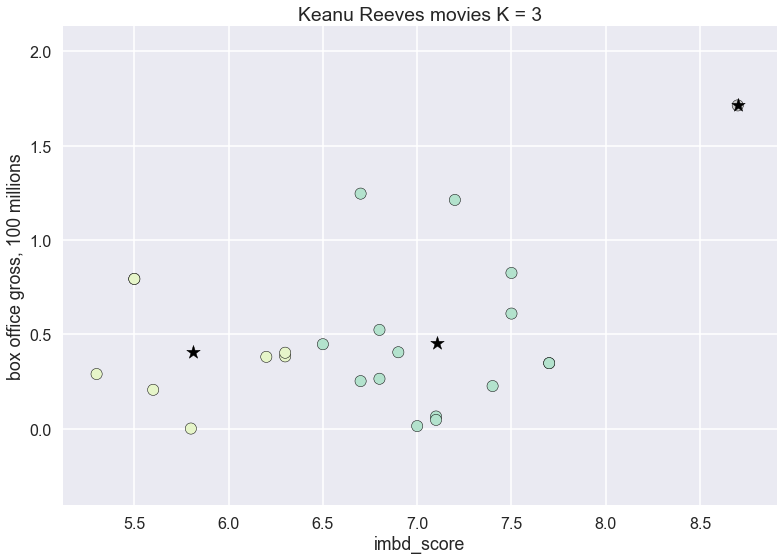

In [37]:
@interact_manual(k=(1, 6))
def imdb(k):
    kmeans = KMeans(n_clusters=k, random_state=1337, n_jobs=4).fit(X)
    
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap=cmap, edgecolors='black')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='*')
    plt.axis('equal')
    plt.xlabel('imbd_score')
    plt.ylabel('box office gross, 100 millions')
    plt.title("Keanu Reeves movies K = {}".format(k));

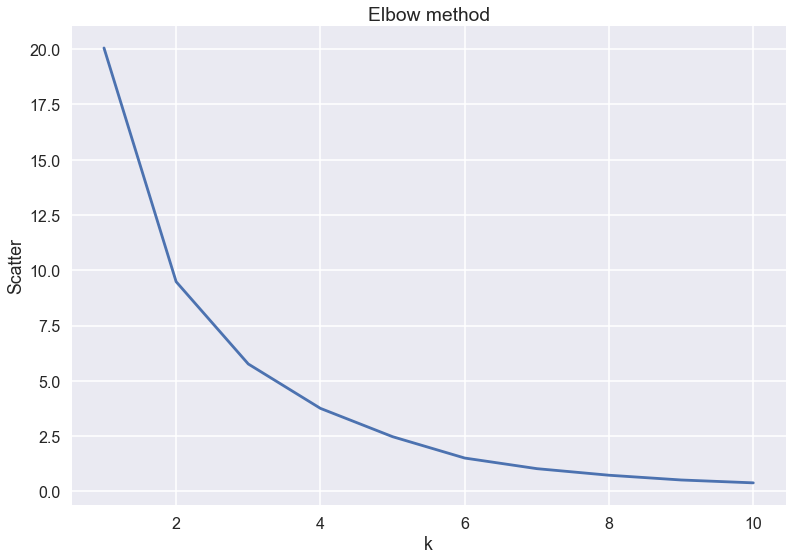

In [38]:
ks = []
scatter = []

for k in range(10):
    kmeans = KMeans(n_clusters=k+1).fit(X)
    ks.append(k+1)
    scatter.append(kmeans.inertia_)
    
plt.plot(ks, scatter)
plt.title("Elbow method")
plt.xlabel("k")
plt.ylabel("Scatter");

## Analysis
If you're into Keanu Reeves movies, it could be fun to look at how his movies fall into each cluster.We can then try to come up with a name for each cluster that explains the combination of featuresWe used in the clustering.We can already see that Keanu Reeve's highest grossing, highest rated film which gets a cluster all to itself is "The Matrix". But what about the other clusters? What ifWe used more features with our clustering? Would such a clustering be useful in a movie recommendation system?

In [39]:
kmeans = KMeans(n_clusters=3, random_state=1337, n_jobs=4).fit(X)
np.where(kmeans.labels_ == 2)
data.iloc[3]

color                                                                    Color
director_name                                                   Lana Wachowski
num_critic_for_reviews                                                     313
duration                                                                   136
director_facebook_likes                                                      0
actor_3_facebook_likes                                                      99
actor_2_name                                                      Marcus Chong
actor_1_facebook_likes                                                   18000
gross                                                              1.71383e+08
genres                                                           Action|Sci-Fi
actor_1_name                                                      Keanu Reeves
movie_title                                                        The Matrix 
num_voted_users                                     

# Challenge

## Instructions:
Cluster movies from the imdb5000 dataset using your choice of features. You can choose as many features as you like, but remember, if you choose more than 3 features you will not be able to visualize the clusters (yet). Use the elbow method to choose k. Have fun with it, and see if you can you come up with informative names for your clusters.


To easily scale your features, use: 
```python
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
```

If you choose to use categorical features or text you will have to encode them appropriately.



In [40]:
movies.shape

(5043, 28)

# Conclusion
In this notebook. We learned about **Unsupervised Learning** and **Clustering**. We built the k-means algorithm in numpy and learned that k-means is fast, scalable and simple. However, k-means doesn't always get the right ansIr, either due to poor initializations or bad distance metrics. We also learned how to use scatter (kmeans.inertia_) to evaluate how far our points are from their assigned cluster center and leveraged scatter via the elbow method to inform our choice of k. Finally,We used k-means to find groups of similar movies in the real-world **imdb5000** dataset.

## Visualization code

In [ ]:
# from sklearn.datasets import make_s_curve
# from mpl_toolkits.mplot3d import Axes3D
# X, y = make_s_curve(n_samples=1000)

In [ ]:
# fig = plt.figure()

# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(7, -80)
# ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=cmap, edgecolors='black');

In [ ]:
# make data
# X, y = make_blobs(n_samples=250,
#                   n_features=2,
#                   centers=3, # true number of cluster centers
#                   cluster_std=0.25,
#                   center_box=(-5,5),
#                  random_state=20)

# centroids = initialize_centroids(X, 3)
# distances = compute_distances(X, centroids)
# labels = assign_points(distances)

# new_centroids = move_centroids(X, labels, centroids)
# dist2 = compute_distances(X, new_centroids)
# labels2 = assign_points(dist2)
# plt.figure(figsize=(20, 5))

# plt.subplot(141)
# plt.scatter(X[:,0], X[:,1], cmap=cmap, edgecolors='black')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*')
# plt.title('Initialize k Centroids')
# plt.axis('equal')


# plt.subplot(142)
# plt.scatter(X[:,0], X[:,1], c=labels, cmap=cmap, edgecolors='black')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*');
# plt.title('Assign Points')
# plt.axis('equal')



# plt.subplot(143)
# plt.scatter(X[:,0], X[:,1], c=labels, cmap=cmap, edgecolors='black')
# plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='black', s=200, marker='*')
# plt.title('Move Centriods')
# plt.axis('equal')


# plt.subplot(144)
# plt.scatter(X[:,0], X[:,1], c=labels2, cmap=cmap, edgecolors='black')
# plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='black', s=200, marker='*')
# plt.title('Assign Points')
# plt.axis('equal');



# plt.savefig('kmeans.png')

In [ ]:
# clusters = 3
# k = 3
# num_iterations = 5

# # make data
# X, y = make_blobs(n_samples=250,
#                   n_features=2,
#                   centers=clusters, # true number of cluster centers
#                   cluster_std=0.25,
#                   center_box=(-5,5),
#                   random_state=20)

# centroids = initialize_centroids(X, k)
# iteration = 1 # for looping with animate


# fig = plt.figure();
# ax = plt.axes()
# line, = ax.plot([], [], lw=2)


# def init():
#     line.set_data([], [])
#     return line,

# def animate(i):
#     global centroids
#     global iteration
#     distances = compute_distances(X, centroids)
#     labels = assign_points(distances)
#     centroids = move_centroids(X, labels, centroids)
#     ax.cla()
#     ax.scatter(X[:,0], X[:,1], c=labels, cmap=cmap, edgecolors='black')
#     ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*');
#     ax.set_title("K-means, {} Clusters, Iteration: {}".format(k, iteration))
#     ax.axis('equal')
#     iteration += 1
#     return line,

# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                         frames=num_iterations, interval=800, blit=True)
# anim.save('kmeans.gif', writer='imagemagick', fps=1.2)


In [ ]:
# X = np.random.uniform(size=(150,2)) # random uniform data


# fig = plt.figure();
# ax = plt.axes()
# line, = ax.plot([], [], lw=2)
# centroids = initialize_centroids(X, 3)
# iteration = 1

# def init():
#     line.set_data([], [])
#     return line,

# def animate(i):
#     global centroids
#     global iteration
#     distances = compute_distances(X, centroids)
#     labels = assign_points(distances)
#     centroids = move_centroids(X, labels, centroids)
#     ax.cla()
#     ax.scatter(X[:,0], X[:,1], c=labels, cmap=cmap, edgecolors='black')
#     ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='*');
#     ax.set_title("K-means Iteration: {}".format(iteration))
#     ax.axis('equal')
#     iteration += 1
#     return line,

# animation.FuncAnimation(fig, animate, init_func=init,
#                         frames=10, interval=800)

# Resources
- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- http://flothesof.github.io/k-means-numpy.html
- http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/